# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

## #1

In [37]:
# Load in airbnb data and clean the Price variable
import pandas as pd
airbnb_df = pd.read_csv('airbnb_hw.csv')
print( airbnb_df.shape, '\n')

price = airbnb_df['Price']
price = price.str.replace(',','') # Replace commas with nothing
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
airbnb_df['Price'] = price
del price
airbnb_df.head()

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


## #2

In [38]:
# What are are the dimensions of the data?
shape = airbnb_df.shape
print( '\nDatatable Dimensions: ', shape)

# How many observations are there?
print('\nNumber of Observations: ', shape[0])

# What are the variables included?
print( '\nVariables Included: ', airbnb_df.columns)

# Use .head() to examine the first few rows of data.
airbnb_df.head()



Datatable Dimensions:  (30478, 13)

Number of Observations:  30478

Variables Included:  Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


## #3

In [39]:
# Cross tabulate Room Type and Property Type.
pd.crosstab(airbnb_df['Property Type'], airbnb_df['Room Type'])

# What patterns do you see in what kinds of rentals are available?
# The more traditional rentals (apartments, houses, lofts, bed & breakfasts) are
# signifcantly more popular than the more niche, specialty properties
# (such as boats, treehouses, castle, etc.)
# For the following kinds of properties, private rooms are more common than renting the entire property:
# bed & breakfast, castle, chalet, dorm, house, hut, other, tent, treehouse


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


## #4

<Axes: xlabel='Price', ylabel='Count'>

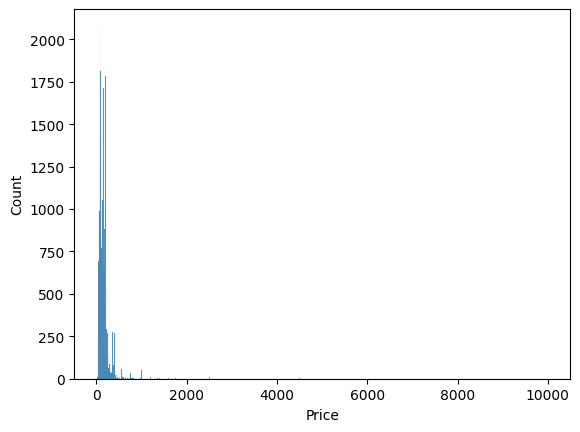

In [40]:
# For Price, make a histogram, kernel density, box plot, and a statistical description of the variable.
# Are the data badly scaled? Are there many outliers?
# Use log to transform price into a new variable, price_log, and take these steps again.

# Histogram:

sns.histplot(data=airbnb_df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

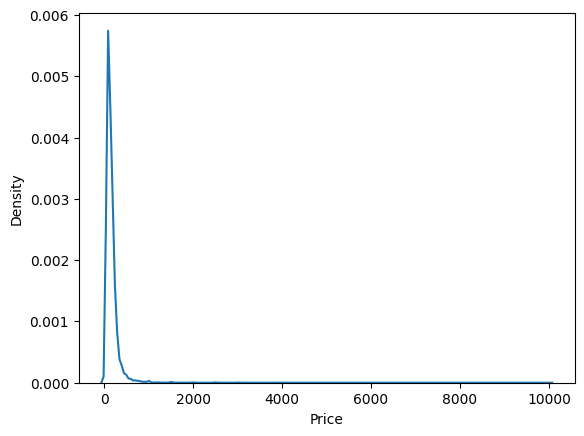

In [41]:
# Kernel density:
sns.kdeplot(data=airbnb_df,x='Price')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

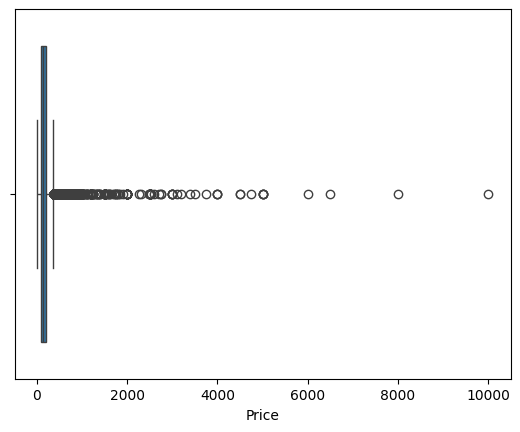

In [42]:
# Box plot:
# Best to show outliers
sns.boxplot(data=airbnb_df,x='Price')

In [43]:
# Stats desciption of price variable:
airbnb_df['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


In [44]:
# Using log to transform price into a new variable:
# Much better to narrow the scale and see zoomed in version of data
airbnb_df['Price_log'] = np.log(airbnb_df['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

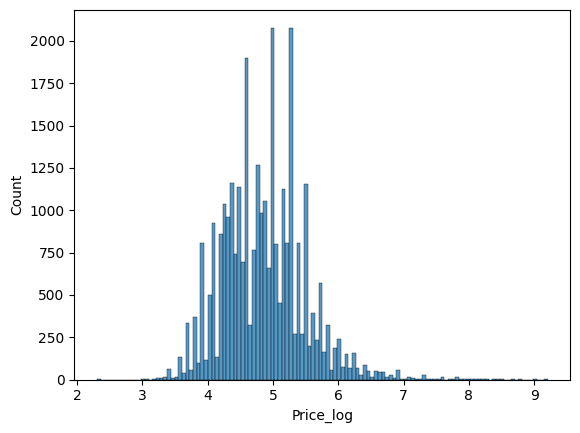

In [45]:
# Histogram with new Price_log:
sns.histplot(data=airbnb_df,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

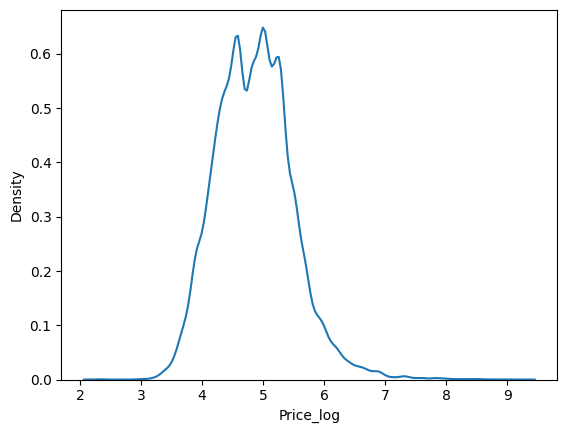

In [46]:
# Kernel density with new Price_log:
sns.kdeplot(data=airbnb_df,x='Price_log')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price_log'>

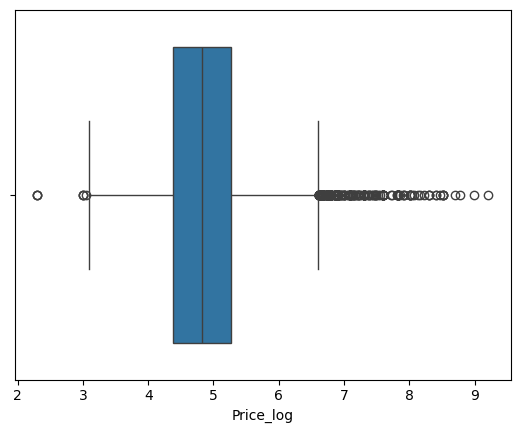

In [47]:
# Box plot with new Price_log:
sns.boxplot(data=airbnb_df,x='Price_log')

In [48]:
# Stats description with new Price_log:
airbnb_df['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


## #5

<Axes: xlabel='Beds', ylabel='Price_log'>

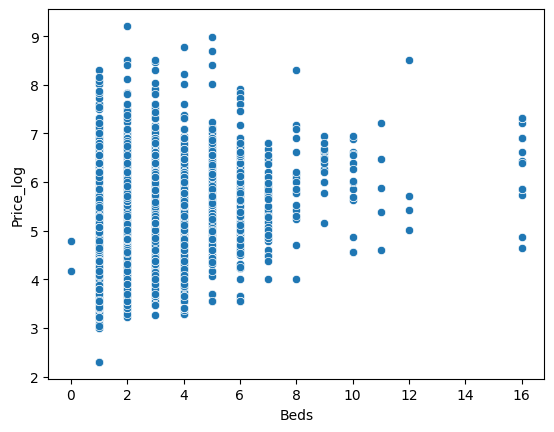

In [49]:
# Make a scatterplot of price_log and Beds.

sns.scatterplot(data=airbnb_df,x='Beds',y='Price_log')

# Describe what you see
# Weak positive correlation. Generally, listings with more beds tend to have
# higher log-transformed prices, although this relationship is not strictly linear.
# The log-transformed price for most listings falls between 3 and 9,
# which corresponds to actual prices ranging from approximately $20 to $800.

In [50]:
# Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds.

airbnb_df.loc[:,['Beds','Price']].groupby('Beds').describe()

# Describe any patterns you see in the average price and standard deviation in prices.
# As the number of beds goes up, the price tends to increase: 12 beds has the highest
# average price and standard deviation and 0 beds has the lowest.
# Prices for 7 beds drop, maybe indicating it is an awkward number in terms of
# group size and the coupling up of parties.

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

## #6

<Axes: xlabel='Beds', ylabel='Price_log'>

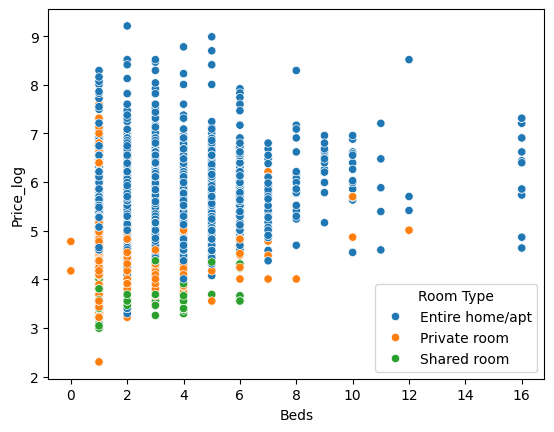

In [58]:
# Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type.

sns.scatterplot(data=airbnb_df,x='Beds',y='Price_log',hue='Room Type')

# What patterns do you see?
# Entire home/apt are the most common property type, followed by private room
# and then shared rooom. The demand also reflects their prices, with
# entire homes have a higher price_log and shared rooms being cheaper.

In [62]:
# Compute a description of Price conditional on Room Type and Property Type.
var = 'Price'
group = 'Room Type'
airbnb_df.loc[:,[group,var]].groupby(group).describe()

# Which Room Type and Property Type have the highest prices on average?
# Entire home/apt

# Which have the highest standard deviation?
# Entire home/apt

# Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
# Mean/median seems to be just as reliable as the plot above, as they both indicate
# that entire home/apt is the most popular, highest priced, and largest standard
# dev, which can also be derived from the plot.

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

## #**7**

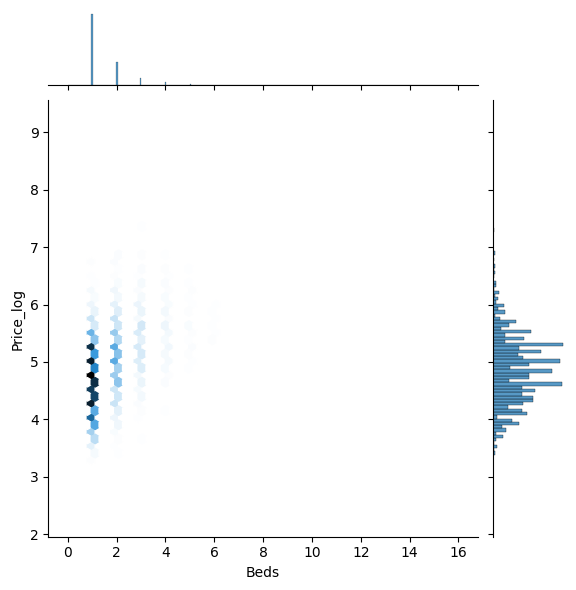

In [61]:
# We've looked a bit at this price_log and Beds scatterplot.
# Use seaborn to make a jointplot with kind=hex.

sns.jointplot(data=airbnb_df,x='Beds',y='Price_log',kind='hex')

# Where are the data actually distributed?
# Majority of the properties for rent have 1 or 2 beds, and some properties with 3 or 4 beds.
# There are very few properties in the 5-16 range.
# Likewise, a majority of properties are within a price band of 2.5 to 6 log points.

# How does it affect the way you think about the plots in 5 and 6?
# Exaggeration / over attention of outliers, but majority of points fall within
# the pattern that is described above.


**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

## #**1**

In [70]:
# Pick and download data
# What I chose: COVID-19 Nursing Home Data
# https://data.cms.gov/covid-19/covid-19-nursing-home-data


nursing_df = pd.read_csv('COVID-19 Nursing Home Data 09.15.2024.csv', on_bad_lines='skip')
nursing_df.head()

<ipython-input-70-361b1911ca58>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  nursing_df = pd.read_csv('COVID-19 Nursing Home Data 09.15.2024.csv', on_bad_lines='skip')


,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,"Total Resident COVID-19 Deaths Per 1,000 Residents","Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,15009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## #**2**

In [72]:
# Does the data dictionary document how missings are handled?
# No, it does not

# For categorical variables, does it describe the possible values and missing value codes?
# Yes, column names are listed in a table with their description and their value type
# (date, text, number - being the options for types)

# For the numeric variables, does it describe how missing values are handled?
# No, it does not

# Summarize your opinion of the data dictionary
# Descriptions are clear but there is no mention of how missing values are handled.

## #**3**

In [76]:
# Pick out a few interesting variables, and explain why you find them jointly interesting.
pd.crosstab(nursing_df['Provider State'], nursing_df['Residents Weekly All Deaths'])

# Interesting to see deaths by state and how this can be linked to political trends and practices
# along with the perscentage of residents that received the vaccine(s)

Residents Weekly All Deaths,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,68.0,71.0,74.0,99.0,104.0,125.0,136.0,170.0,204.0,522.0
Provider State,,,,,,,,,,,,,,,,,,,,,
AK,3853,551,86,25,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,35570,10142,3409,1042,327,123,63,22,23,19,...,0,0,0,0,0,0,0,0,0,0
AR,36603,8960,2561,615,189,70,28,18,17,13,...,0,0,0,0,0,0,0,0,0,0
AZ,24258,4957,1517,441,141,68,36,25,13,12,...,0,0,0,0,0,0,0,0,0,0
CA,120190,15102,4325,1163,422,148,92,49,35,34,...,0,0,0,0,0,0,0,0,0,0
CO,37258,7859,2391,596,184,90,42,19,15,9,...,0,0,0,0,0,0,0,0,0,0
CT,30396,10136,3428,959,324,95,32,25,13,7,...,0,1,0,0,0,0,0,0,0,0
DC,2848,698,241,55,26,6,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
DE,7157,2050,587,130,39,9,8,3,2,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook
nursing_df.loc[:,['Provider State','Residents Weekly All Deaths', 'Percentage of Current Residents Up to Date with COVID-19 Vaccines']].groupby('Provider State').describe()

# Subset data and columns to just look at specific variables,
# also cleaned when read in data in first step to skip bad/blank lines to avoid errors
# since the dataset is so large and the dictionary doesn't mention how missed values
# are handled.

Residents Weekly All Deaths                                     \
                                     count      mean       std  min  25%  50%   
Provider State                                                                  
AK                                  4517.0  0.179101  0.479913  0.0  0.0  0.0   
AL                                 50822.0  0.477647  1.112953  0.0  0.0  0.0   
AR                                 49129.0  0.374178  0.901501  0.0  0.0  0.0   
AZ                                 31503.0  0.359744  0.950058  0.0  0.0  0.0   
CA                                141717.0  0.239294  0.906924  0.0  0.0  0.0   
CO                                 48509.0  0.350471  0.929535  0.0  0.0  0.0   
CT                                 45528.0  0.538394  1.435922  0.0  0.0  0.0   
DC                                  3884.0  0.419928  1.152106  0.0  0.0  0.0   
DE                                  9998.0  0.421384  1.199000  0.0  0.0  0.0   
FL                                155373.0  0.358724  0.907374  0.0  0.0  0.0   
GA                                 79428.0  0.316664  0.915337  0.0  0.0  0.0   
HI                                  9459.0  0.389788  0.834335  0.0  0.0  0.0   
IA                                 93894.0  0.319669  0.776522  0.0  0.0  0.0   
ID                                 18175.0  0.225144  0.580615  0.0  0.0  0.0   
IL                                156534.0  0.409195  1.482430  0.0  0.0  0.0   
IN                                116705.0  0.401474  1.825911  0.0  0.0  0.0   
KS                                 66924.0  0.306123  0.913986  0.0  0.0  0.0   

                            \
                75%    max   
Provider State               
AK              0.0    7.0   
AL              1.0   44.0   
AR              1.0   33.0   
AZ              0.0   49.0   
CA              0.0   56.0   
CO              0.0   35.0   
CT              1.0   71.0   
DC              1.0   38.0   
DE              1.0   44.0   
FL              0.0   37.0   
GA              0.0   40.0   
HI              1.0   25.0   
IA              0.0   33.0   
ID              0.0   14.0   
IL              1.0  204.0   
IN              1.0  522.0   
KS              0.0   49.0   

               Percentage of Current Residents Up to Date with COVID-19 Vaccines  \
                                                                           count   
Provider State                                                                     
AK                                                         3426.0                  
AL                                                        38153.0                  
AR                                                        37196.0                  
AZ                                                        23796.0                  
CA                                                       106293.0                  
CO                                                        36023.0                  
CT                                                        34060.0                  
DC                                                         2923.0                  
DE                                                         7475.0                  
FL                                                       116563.0                  
GA                                                        60051.0                  
HI                                                         7171.0                  
IA                                                        70100.0                  
ID                                                        13537.0                  
IL                                                       117319.0                  
IN                                                        88085.0                  
KS                                                        49843.0                  

                                                                        
                     mean        std  m

## #**4**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Residents Weekly All Deaths'>

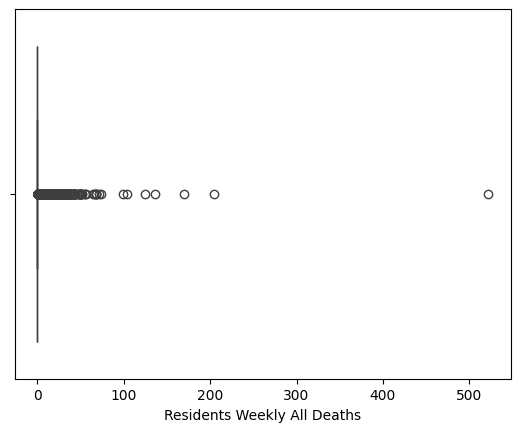

In [79]:
# For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable.
sns.boxplot(data=nursing_df,x='Residents Weekly All Deaths')

# Do you see any outliers?
# best to see outliers in boxplot below, with any values or circles above 100

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines'>

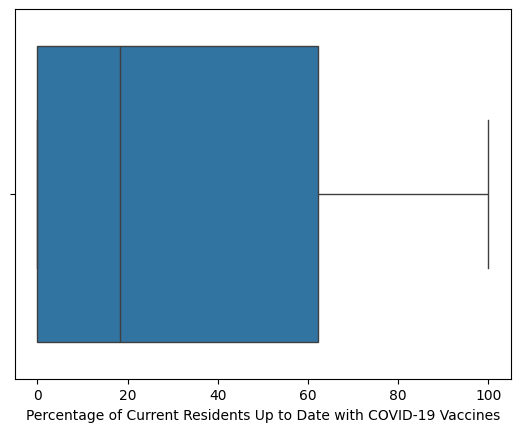

In [80]:
sns.boxplot(data=nursing_df,x='Percentage of Current Residents Up to Date with COVID-19 Vaccines')

## #**5**

<Axes: xlabel='Residents Weekly All Deaths', ylabel='Count'>

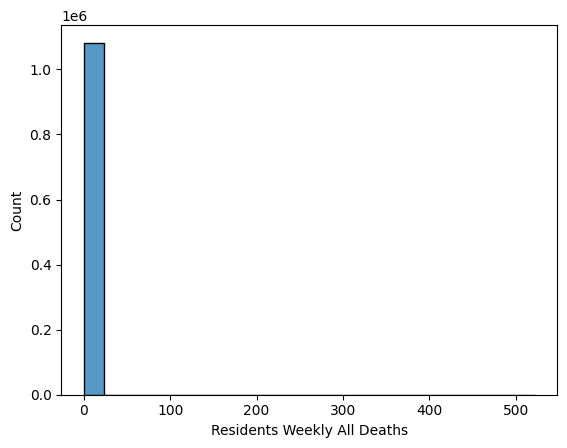

In [81]:
# Create a histogram or kernel density plot, and explain what you see.
sns.histplot(data=nursing_df,x='Residents Weekly All Deaths')

In [86]:
# Do the results require any transformations to rescale them?
nursing_df['Weakly_deaths_log'] = np.log(nursing_df['Residents Weekly All Deaths'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Weakly_deaths_log', ylabel='Count'>

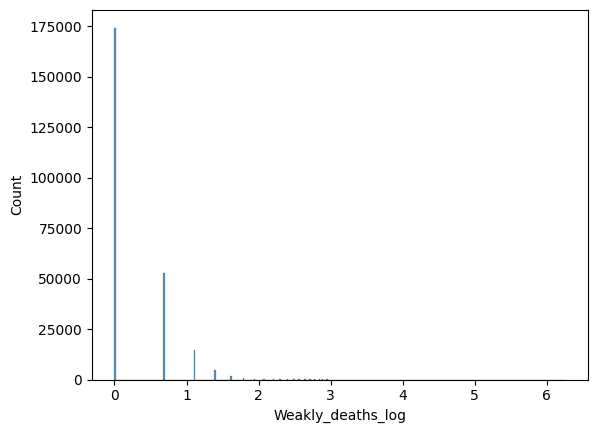

In [87]:
sns.histplot(data=nursing_df,x='Weakly_deaths_log')

## #**6**

<Axes: xlabel='Weakly_deaths_log', ylabel='Percentage of Current Residents Up to Date with COVID-19 Vaccines'>

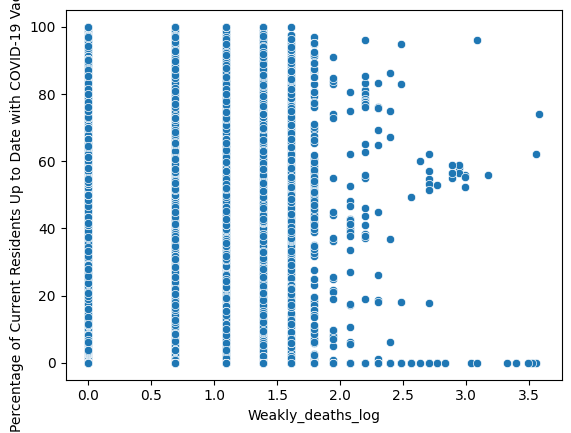

In [88]:
# Create a scatter plot, and describe the relationship you see.
sns.scatterplot(data=nursing_df,x='Weakly_deaths_log',y='Percentage of Current Residents Up to Date with COVID-19 Vaccines')

# Struggle interpretting, tried to sort by state but was unsuccessful

## #**7**

In [89]:
# Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see
pd.crosstab(nursing_df['Provider State'], nursing_df['Residents Weekly All Deaths'])

# Question on how data is being collected, and how it is interpretted, for weeks with "0.0" deaths?
# Is this only in nursing homes?
# Most states report a large number of weeks with 0 or 1 resident death
# Factors that could influence the difference between state and death count:
# Population, weather (retirement vs city, etc.), health care quality
# I didn't grasp a great understanding on this, nor do I think I picked the best
# variables to look at, but in general the assignment taught me more on how to
# select certain variables, use sns to plot relationships, and become more
# comfortable with csvs :) so I found it helpful, even though I didn't fully
# understand the entirety of question four.

Residents Weekly All Deaths,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,68.0,71.0,74.0,99.0,104.0,125.0,136.0,170.0,204.0,522.0
Provider State,,,,,,,,,,,,,,,,,,,,,
AK,3853,551,86,25,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,35570,10142,3409,1042,327,123,63,22,23,19,...,0,0,0,0,0,0,0,0,0,0
AR,36603,8960,2561,615,189,70,28,18,17,13,...,0,0,0,0,0,0,0,0,0,0
AZ,24258,4957,1517,441,141,68,36,25,13,12,...,0,0,0,0,0,0,0,0,0,0
CA,120190,15102,4325,1163,422,148,92,49,35,34,...,0,0,0,0,0,0,0,0,0,0
CO,37258,7859,2391,596,184,90,42,19,15,9,...,0,0,0,0,0,0,0,0,0,0
CT,30396,10136,3428,959,324,95,32,25,13,7,...,0,1,0,0,0,0,0,0,0,0
DC,2848,698,241,55,26,6,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
DE,7157,2050,587,130,39,9,8,3,2,0,...,0,0,0,0,0,0,0,0,0,0
